In [2]:
!pip install --upgrade pip
!pip install --upgrade transformers datasets[audio] accelerate evaluate jiwer
!pip install matplotlib
!pip install -q transformers pydub torchaudio ffmpeg


In [3]:
from datasets import load_dataset
from google.colab import userdata



import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline, SeamlessM4Tv2ForSpeechToText
from datasets import load_dataset, Audio

import evaluate
import jiwer # jiwer is the backend for the wer metric

cv_17 = load_dataset("mozilla-foundation/common_voice_17_0", "af", split="validated", token = userdata.get('HF_TOKEN'), trust_remote_code=True)

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)


processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
    generate_kwargs={"language": "af"}
)

prediction = []
actual = []

for x in cv_17:
  result = pipe(x["audio"])
  prediction.append(result["text"])
  actual.append(x["sentence"])
  print(x["sentence"])
  print(result["text"])

config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
You have passed language=af, but also have set `forced_decoder_ids` to [[1, None], [2, 50360]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of language=af.


Hou op jou naels kou!
 Hoe op jou nals kooi?
Dit is dus belangrik dat jou akademiese gedrag altyd eties is.
 Dit is dus belangrik dat jou akademiese gedrag altyd eertis is.
Hierdie Suid-Afrikaners verteenwoordig die hoop en deursettingsvermoë wat ons nasie kenmerk.
 Heer die Zuid-Afrikaners verteenwoog die hoop en doorzettingsvermoe wat ons nasie ken maak.
Hy lees ’n boek
 Helias, a book.
Die insigkomponente word aangedui aan die einde van die voorgestelde antwoord vir elke vraag.
 Die inzichtkomponente word aangeduid aan die einde van die voorgestelde antwoord vir elke vraag.
Hy het skroewe gebruik om die slot aan die deur vas te maak.
 Hy het skruewe gebruik om die slot aan die deur vast te maak.
In hierdie wêreld kon mens dinge vermag waaroor jy voorheen net kon droom.
 In hierdie wereld kon mens dinge vermaag waarvoor jy voor jyn net kon droom.
Evalueer media- en ander invloede op persoonlike lewenstylkeuses en stel gepaste reaksies voor.
 Evalueer media en ander invloeder op perso

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Geen mate van ekonomiese swaarkry en ontevredenheid kan sodanige misdadige gedrag regverdig nie.
 Geen mate van ekonomische swaarkry en ontevredenheid kan so danige misdadige gedrag rechtvaardig nie.
Die Rekenpligtige Beampte is die risiko-kampvegter en voorsitter van die Staatsbestuurskomitee.
 Die rekenplichtige beamte is die risikokampvechter en voorzitter van die staatsbestuurskomitee.
Ek kyk soms televisie
 Ak kyk soms talaviesie.
Die Parlement se konstitusionele hersieningskomitee het verhore in alle provinsies afgesluit.
 Die Parlements Constitutionele Hersieningskomitee het verhoore in alle provincies afgesluit.
Ons infrastruktuurstelsels loop die gevaar om verder agteruit te gaan en uiteindelik te misluk.
 Ons infrastruktuur stelsels loop die gevaar om verder achteruit te gaan en uiteindelik te misluk.
Hy het ’n baie lekker woonstel
 Hy het een baie lakker woonstel.
Hulle aandag was nie noodwendig deurgaans op dieselfde persoon of persone gevestig gewees nie.
 Hulle aandag was

In [5]:
wer_metric = evaluate.load("wer")
overall_wer_whisper_large_v3 = wer_metric.compute(predictions=prediction, references=actual)

print(f"\n--- Evaluation Complete ---")
print(f"Evaluated on {len(prediction)} samples.")
print(f"Overall Word Error Rate (WER): {overall_wer_whisper_large_v3:.4f}")
print(f"(Lower WER is better. 0 indicates perfect transcription.)")


--- Evaluation Complete ---
Evaluated on 198 samples.
Overall Word Error Rate (WER): 0.3423
(Lower WER is better. 0 indicates perfect transcription.)


In [6]:


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-small"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)


processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
    generate_kwargs={"language": "af"}
)

prediction = []
actual = []

for x in cv_17:
  result = pipe(x["audio"])
  prediction.append(result["text"])
  actual.append(x["sentence"])
  print(x["sentence"])
  print(result["text"])

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Device set to use cuda:0
You have passed language=af, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of language=af.


Hou op jou naels kou!
 Go op, jo, naar is go.
Dit is dus belangrik dat jou akademiese gedrag altyd eties is.
 Dit is dus belangrijk dat jouw academieza gedraag altijd eerdus is.
Hierdie Suid-Afrikaners verteenwoordig die hoop en deursettingsvermoë wat ons nasie kenmerk.
 Heer die ze het afrikaans verteen volg die woop en geurzittingsformaal wat ons nase kan maak.
Hy lees ’n boek
 Heelia is a book.
Die insigkomponente word aangedui aan die einde van die voorgestelde antwoord vir elke vraag.
 De in zich componente word angedij aan die einde van die vorgestalde antwoord ver elke vraag.
Hy het skroewe gebruik om die slot aan die deur vas te maak.
 Had je het screwver gebruik om je sloot aan die dier vast te maak?
In hierdie wêreld kon mens dinge vermag waaroor jy voorheen net kon droom.
 En hier die wereld kon mens dingen vermag, waarvoor jy voor jen net kon droen.
Evalueer media- en ander invloede op persoonlike lewenstylkeuses en stel gepaste reaksies voor.
 Evalieer media en ander in fl

In [7]:
wer_metric = evaluate.load("wer")
overall_wer_whisper_small = wer_metric.compute(predictions=prediction, references=actual)

print(f"\n--- Evaluation Complete ---")
print(f"Evaluated on {len(prediction)} samples.")
print(f"Overall Word Error Rate (WER): {overall_wer_whisper_small:.4f}")
print(f"(Lower WER is better. 0 indicates perfect transcription.)")


--- Evaluation Complete ---
Evaluated on 198 samples.
Overall Word Error Rate (WER): 0.7006
(Lower WER is better. 0 indicates perfect transcription.)


In [8]:

m4tv2_model_id = "facebook/seamless-m4t-v2-large"

# Determine the device and dtype
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float32 # SeamlessM4Tv2 is often used with float32

# Load the processor and model for SeamlessM4Tv2
processor_m4tv2 = AutoProcessor.from_pretrained(m4tv2_model_id)
model_m4tv2 = SeamlessM4Tv2ForSpeechToText.from_pretrained(m4tv2_model_id)

# Move the model to the appropriate device
model_m4tv2.to(device)

# Resample the audio data in the dataset to 16000 Hz to match the model's expected sampling rate
target_sampling_rate = 16000
cv_17 = cv_17.cast_column("audio", Audio(sampling_rate=target_sampling_rate))


prediction_m4tv2 = []
actual_m4tv2 = []

# Iterate through the dataset and perform transcription
for x in cv_17:
    # Access the audio data and sampling rate (now resampled)
    audio_array = x["audio"]["array"]
    sampling_rate = x["audio"]["sampling_rate"]

    # Process the audio input
    inputs = processor_m4tv2(
        audios=audio_array,
        sampling_rate=sampling_rate,
        return_tensors="pt",
        src_lang="afr"
    ).to(device)

    # Generate predictions using the model
    # Removed generate_speech=False as SeamlessM4Tv2ForSpeechToText does not support speech generation
    output_tokens = model_m4tv2.generate(**inputs, tgt_lang="afr")

    # Decode the predicted tokens back to text
    transcription = processor_m4tv2.batch_decode(output_tokens, skip_special_tokens=True)[0]

    # Append results to the lists
    prediction_m4tv2.append(transcription)
    actual_m4tv2.append(x["sentence"])

    # Print results for monitoring
    print(f"SeamlessM4Tv2 - Actual: {x['sentence']}")
    print(f"SeamlessM4Tv2 - Prediction: {transcription}")


# --- Evaluation for SeamlessM4Tv2 ---
# Assuming wer_metric is already loaded from the previous section
# import evaluate
# import jiwer
# wer_metric = evaluate.load("wer")

overall_wer_m4tv2 = wer_metric.compute(predictions=prediction_m4tv2, references=actual_m4tv2)

print(f"\n--- Evaluation Complete (Model: {m4tv2_model_id}) ---")
print(f"Evaluated on {len(prediction_m4tv2)} samples.")
print(f"Overall Word Error Rate (WER): {overall_wer_m4tv2:.4f}")
print(f"(Lower WER is better. 0 indicates perfect transcription.)")

preprocessor_config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.17M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/211k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.24G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Instantiating a decoder SeamlessM4Tv2Attention without passing `layer_idx` is not recommended and will lead to errors during the forward call, if caching is used. Please make sure to provide a `layer_idx` when creating this class.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/9.91M [00:00<?, ?B/s]

SeamlessM4Tv2 - Actual: Hou op jou naels kou!
SeamlessM4Tv2 - Prediction: Op jou nou is goud
SeamlessM4Tv2 - Actual: Dit is dus belangrik dat jou akademiese gedrag altyd eties is.
SeamlessM4Tv2 - Prediction: Dit is dus belangrik dat jou akademiese gedrag altyd eietis is
SeamlessM4Tv2 - Actual: Hierdie Suid-Afrikaners verteenwoordig die hoop en deursettingsvermoë wat ons nasie kenmerk.
SeamlessM4Tv2 - Prediction: Hierdie Suid-Afrikaners verteenwoordig die hoop en deursettingsvermoë wat ons nasie vorm
SeamlessM4Tv2 - Actual: Hy lees ’n boek
SeamlessM4Tv2 - Prediction: Hailius 'n boek.
SeamlessM4Tv2 - Actual: Die insigkomponente word aangedui aan die einde van die voorgestelde antwoord vir elke vraag.
SeamlessM4Tv2 - Prediction: Die insigkomponent word aangedui aan die einde van die voorgestelde antwoord vir elke vraag.
SeamlessM4Tv2 - Actual: Hy het skroewe gebruik om die slot aan die deur vas te maak.
SeamlessM4Tv2 - Prediction: Hy het skroewe gebruik om die slot aan die deur vas te maa

In [9]:
import openai
import tempfile
import soundfile as sf
import evaluate
from datasets import load_dataset, Audio
from google.colab import userdata

# Set your OpenAI API key
openai.api_key = userdata.get("OPENAPI_TOKEN")

cv_17Casted = cv_17.cast_column("audio", Audio(sampling_rate=16000))

# Load WER metric
wer_metric = evaluate.load("wer")

# Prepare lists to collect predictions and references
predictions = []
references = []

# Loop over the dataset
for sample in cv_17Casted:
    audio_array = sample["audio"]["array"]
    sample_rate = sample["audio"]["sampling_rate"]
    reference_text = sample["sentence"]

    # Save to a temporary .wav file
    with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio_file:
        sf.write(temp_audio_file.name, audio_array, samplerate=sample_rate)
        temp_audio_file.flush()

        # Transcribe using OpenAI Whisper or GPT-4o
        with open(temp_audio_file.name, "rb") as f:
            response = openai.audio.transcriptions.create(
                model="gpt-4o-transcribe",  # or "gpt-4o-transcribe" if available
                file=f,
                response_format="text",
                language="af"
            )

    transcription = response.strip()

    # Store results
    predictions.append(transcription)
    references.append(reference_text)

    # Optional: print each result
    print(f"Actual:      {reference_text}")
    print(f"Prediction:  {transcription}\n")

# Compute Word Error Rate
overall_wer_open_api = wer_metric.compute(predictions=predictions, references=references)
print(f"\n--- OpenAI Transcription Evaluation ---")
print(f"Samples evaluated: {len(predictions)}")
print(f"Word Error Rate: {overall_wer_open_api:.4f}")


Actual:      Hou op jou naels kou!
Prediction:  Hou op jou neus krap.

Actual:      Dit is dus belangrik dat jou akademiese gedrag altyd eties is.
Prediction:  Dit is dus belangrik dat jou akademiese gedrag altyd eties is.

Actual:      Hierdie Suid-Afrikaners verteenwoordig die hoop en deursettingsvermoë wat ons nasie kenmerk.
Prediction:  Hierdie Suid-Afrikaners verteenwoordig die hoop en deursettingsvermoë wat ons nasie kenmerk.

Actual:      Hy lees ’n boek
Prediction:  Hy lees 'n boek.

Actual:      Die insigkomponente word aangedui aan die einde van die voorgestelde antwoord vir elke vraag.
Prediction:  Die insigkomponente word aangedui aan die einde van die voorgestelde antwoord vir elke vraag.

Actual:      Hy het skroewe gebruik om die slot aan die deur vas te maak.
Prediction:  Hy het skroewe gebruik om die slot aan die deur vas te maak.

Actual:      In hierdie wêreld kon mens dinge vermag waaroor jy voorheen net kon droom.
Prediction:  In hierdie wêreld kon mens dinge verma

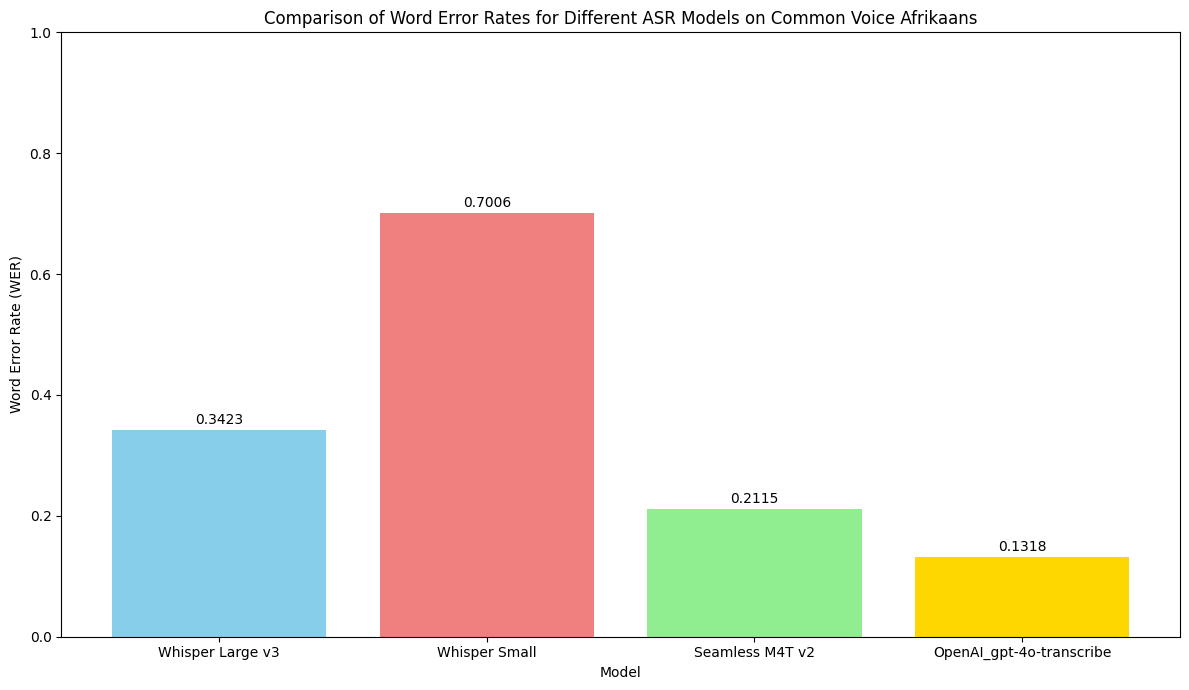

In [10]:
 import matplotlib.pyplot as plt

model_names = [
    "Whisper Large v3",
    "Whisper Small",
    "Seamless M4T v2",
    "OpenAI_gpt-4o-transcribe"
]

wer_values = [
    overall_wer_whisper_large_v3,
    overall_wer_whisper_small,
    overall_wer_m4tv2,
    overall_wer_open_api
]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(model_names, wer_values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Word Error Rate (WER)")
plt.title("Comparison of Word Error Rates for Different ASR Models on Common Voice Afrikaans")
plt.ylim(0, 1) # Set the y-axis limit from 0 to 1

# Optional: Add the WER values on top of the bars
for i, value in enumerate(wer_values):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center') # Increased precision in text

# Ensure layout is tight to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()